In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as mpatches

In [66]:
# Custom palette for Hastings logo
hastings_palette = ["#f1f1f5", '#1778b9',"#e00430"]

In [67]:
insurance_df = pd.read_excel('Motor RP Analyst Interview Activity.xlsx', sheet_name='Data')
insurance_df.head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,16042,2019-02-28,0.002740,0.00000,0.0000,0,NaN,NaN,NaN,NaN,...,FIAT,20,20,1,MANUAL,East Midlands,Male,2019-02-01 00:00:00,2016-11-26,Blue
1,41414,2019-03-20,1.000000,238.33650,238.3365,0,NaN,NaN,NaN,NaN,...,FORD,25,25,1,MANUAL,South East,Female,2017-11-01 00:00:00,2012-03-12,Grey
2,58837,2019-11-29,0.420765,77.31347,183.7450,0,NaN,NaN,NaN,NaN,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,2016-09-01 00:00:00,1994-11-09,Silver
3,65415,2019-02-17,1.000000,494.98150,246.5586,0,NaN,NaN,NaN,NaN,...,NISSAN,31,31,1,AUTOMATIC,North West,Female,2019-02-16 00:00:00,2019-07-01,White
4,81565,2018-04-24,1.000000,120.05060,120.0506,0,NaN,NaN,NaN,NaN,...,KIA,61,61,1,MANUAL,South West,Male,2013-06-01 00:00:00,1974-04-07,Silver


## Quick Checks

In [68]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      100000 non-null  int64         
 1   start_date              100000 non-null  datetime64[ns]
 2   exposure                100000 non-null  float64       
 3   net_earned_premium      99978 non-null   float64       
 4   net_written_premium     100000 non-null  float64       
 5   claim_count             100000 non-null  int64         
 6   is_capped_incurred      7419 non-null    float64       
 7   incurred                7419 non-null    float64       
 8   capped_incurred         7419 non-null    float64       
 9   bi_incurred             7419 non-null    float64       
 10  ad_incurred             7419 non-null    float64       
 11  pd_incurred             7419 non-null    float64       
 12  th_incurred             7419 no

In [69]:
insurance_df.columns

Index(['id', 'start_date', 'exposure', 'net_earned_premium',
       'net_written_premium', 'claim_count', 'is_capped_incurred', 'incurred',
       'capped_incurred', 'bi_incurred', 'ad_incurred', 'pd_incurred',
       'th_incurred', 'ws_incurred', 'bi_count', 'ad_count', 'pd_count',
       'th_count', 'ws_count', 'business_provider', 'cover', 'voluntary_xs',
       'ncd', 'pncd', 'vehicle_use', 'entitlement', 'overnight_location',
       'vehicle_value', 'vehicle_annual_mileage', 'vehicle_age',
       'vehicle_make', 'd1_age', 'd1_residency_years', 'd1_is_uk_resident',
       'transmission', 'region', 'gender', 'vehicle_purchase_date',
       'licence_test_date', 'primary_car_colour'],
      dtype='object')

In [70]:
# Show all cols
insurance_df.describe()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,ws_count,voluntary_xs,ncd,vehicle_value,vehicle_annual_mileage,vehicle_age,d1_age,d1_residency_years,d1_is_uk_resident,licence_test_date
count,100000.000000,100000,100000.000000,99978.000000,100000.000000,100000.000000,7419.000000,7419.000000,7419.000000,7419.000000,...,7419.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,99993
mean,50000.500000,2019-03-20 00:31:23.520000256,0.719595,272.432194,364.273773,0.079340,0.001483,2797.004851,2589.680535,989.259222,...,0.256638,197.238500,5.449590,5525.167150,6878.596280,8.378470,39.937510,38.400150,0.92853,2002-08-24 07:05:07.065494656
min,1.000000,2018-04-01 00:00:00,0.002732,-1134.753000,0.000000,0.000000,0.000000,-1854.640000,-1854.640000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,17.000000,0.000000,0.00000,1958-03-04 00:00:00
25%,25000.750000,2018-09-15 00:00:00,0.439891,114.164475,181.881875,0.000000,0.000000,34.500000,34.500000,0.000000,...,0.000000,100.000000,2.000000,1695.000000,5000.000000,5.000000,26.000000,25.000000,1.00000,1994-05-24 00:00:00
50%,50000.500000,2019-03-21 00:00:00,0.937159,206.621700,284.771550,0.000000,0.000000,159.500000,159.500000,0.000000,...,0.000000,250.000000,6.000000,3745.000000,6000.000000,8.000000,38.000000,36.000000,1.00000,2003-05-02 00:00:00
75%,75000.250000,2019-09-09 00:00:00,1.000000,359.323175,455.693300,0.000000,0.000000,2868.070000,2868.070000,0.000000,...,1.000000,250.000000,9.000000,7100.000000,9000.000000,12.000000,51.000000,51.000000,1.00000,2013-03-29 00:00:00
max,100000.000000,2020-03-31 00:00:00,1.000000,3912.240000,4394.661000,4.000000,1.000000,489297.500000,55259.600000,478339.300000,...,3.000000,600.000000,9.000000,163995.000000,400000.000000,41.000000,118.000000,118.000000,1.00000,2020-09-30 00:00:00
std,28867.657797,NaN,0.344350,250.834453,281.664104,0.289941,0.038480,10651.871541,5338.339710,9691.253028,...,0.447479,136.849868,3.637053,5765.353771,4056.018302,4.680995,15.415234,16.449685,0.25761,NaN


In [71]:
## Check unique values in objects

def show_object_uniques(df):
    """
    Display all unique values for object (string/categorical) columns in a DataFrame.
    """
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nColumn: {col}")
        print("-" * (len(col) + 9))
        print(df[col].unique())
        

In [72]:
## Check unique values in objects
show_object_uniques(insurance_df)


Column: business_provider
--------------------------
['CTMDefaultCampaign' 'HDWebsiteDefaultCampaign' 'MSMDefaultCampaign'
 'QuotezoneDefaultCampaign' 'ConfusedDefaultCampaign'
 'GoCompareDefaultCampaign' 'Confused_ECI_IP' 'Unknown'
 'DefaultDefaultCampaign' 'PPC-BingDefaultCampaign' 'CTM_ECI_PC' 'CTM_ECI'
 'CTM_ECI_IP' 'TopCashBackDefaultCampaign'
 'Google_Brand-Gk-Hastings_Direct' 'Confused_ECI' 'CTM_ECI_Hastings'
 'InsurerDefaultCampaign' 'Google_Brand-Gk-Hastings_Direct-Mobile'
 'Confused_ECI_PC' 'uSwitchDefaultCampaign' 'Bing_Car_Brand'
 'QuidcoDefaultCampaign' 'ContactUsPage' 'Confused_ECI_Hastings'
 'IPWebsiteDefaultCampaign' 'PPC-GoogleDefaultCampaign'
 'Google_Car_Gdn/Sr' 'HDWebsiteMulticarTestOne'
 'Google_Generic-Car-Car_Type' 'Google_Car_Generic'
 'Google_Brand-Car_Insurance' 'Google_Car_Brand'
 'Google_Brand-Mobile-Van_Insurance-Exact' 'RenewalRebrokeDefaultCampaign'
 'Google_Brand-Remarketing-Brand' 'PCWebsiteDefaultCampaign'
 'MTARebrokeDefaultCampaign' 'Google_Brand-Gk

In [73]:
insurance_df.isnull().sum()

id                            0
start_date                    0
exposure                      0
net_earned_premium           22
net_written_premium           0
claim_count                   0
is_capped_incurred        92581
incurred                  92581
capped_incurred           92581
bi_incurred               92581
ad_incurred               92581
pd_incurred               92581
th_incurred               92581
ws_incurred               92581
bi_count                  92581
ad_count                  92581
pd_count                  92581
th_count                  92581
ws_count                  92581
business_provider             0
cover                         0
voluntary_xs                  0
ncd                           0
pncd                          0
vehicle_use                   0
entitlement                   0
overnight_location            0
vehicle_value                 0
vehicle_annual_mileage        0
vehicle_age                   0
vehicle_make                776
d1_age  

In [74]:
# Check cols with null net_earned_premium
insurance_df[insurance_df['net_earned_premium'].isnull()].head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
12403,39729,2019-12-02,0.412568,NaN,0.0,0,NaN,NaN,NaN,NaN,...,FIAT,24,24,1,MANUAL,South West,Female,2019-03-01 00:00:00,2018-12-01,White
28675,34290,2018-12-01,0.564384,NaN,0.0,0,NaN,NaN,NaN,NaN,...,FORD,28,28,1,MANUAL,Scotland,Female,2017-07-01 00:00:00,2017-03-17,Black
29357,87570,2018-11-14,0.608219,NaN,0.0,0,NaN,NaN,NaN,NaN,...,CITROEN,45,45,1,MANUAL,North West,Male,2018-11-13 00:00:00,1998-11-13,Black
30700,80529,2018-09-13,1.000000,NaN,0.0,0,NaN,NaN,NaN,NaN,...,BMW,38,29,0,MANUAL,East Midlands,Male,2012-09-01 00:00:00,1998-08-30,Grey
31197,44999,2018-12-20,0.512329,NaN,0.0,0,NaN,NaN,NaN,NaN,...,FORD,50,50,1,MANUAL,West Midlands,Male,2018-11-01 00:00:00,2014-02-10,Silver


In [75]:
## Checking neagitve inccured values
insurance_df[insurance_df['incurred'] < 0].head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
90,70381,2018-05-01,1.000000,218.1073,218.1073,1,0.0,-61.0,-61.0,0.0,...,FORD,40,40,1,MANUAL,East Midlands,Female,2018-04-16 00:00:00,2009-04-16,Blue
180,99011,2018-05-07,1.000000,267.2897,271.3575,1,0.0,-192.0,-192.0,0.0,...,BMW,62,62,1,MANUAL,North West,Female,2016-02-01 00:00:00,1998-04-25,White
487,5840,2018-04-07,1.000000,280.8841,237.0196,1,0.0,-84.5,-84.5,0.0,...,NISSAN,31,31,1,MANUAL,North West,Male,2018-04-01 00:00:00,2005-04-06,NaN
545,1677,2019-01-26,0.726027,650.7096,899.6513,1,0.0,-5.0,-5.0,0.0,...,VAUXHALL,23,23,1,MANUAL,East Midlands,Male,2018-08-01 00:00:00,2014-01-24,NaN
590,45603,2019-02-06,1.000000,302.1702,302.1702,1,0.0,-70.5,-70.5,0.0,...,NISSAN,31,31,1,MANUAL,South East,Female,2019-02-01 00:00:00,2005-02-09,NaN


In [76]:
# Check vehicle age with negative?? # Include all cols
pd.set_option("display.max_columns", None)
result = insurance_df[insurance_df['vehicle_age'] < 0].head(1)
# Reset option
print(result)
pd.reset_option("display.max_columns")

        id start_date  exposure  net_earned_premium  net_written_premium  \
363  97981 2018-09-12       1.0           1292.4962            1256.8816   

     claim_count  is_capped_incurred  incurred  capped_incurred  bi_incurred  \
363            1                 0.0   7917.35          7917.35          0.0   

     ad_incurred  pd_incurred  th_incurred  ws_incurred  bi_count  ad_count  \
363      2863.04      5054.31          0.0          0.0       0.0       1.0   

     pd_count  th_count  ws_count business_provider cover  voluntary_xs  ncd  \
363       1.0       0.0       0.0      Confused_ECI  COMP           500    0   

    pncd vehicle_use entitlement overnight_location  vehicle_value  \
363    N           S         IAC                  R          20000   

     vehicle_annual_mileage  vehicle_age vehicle_make  d1_age  \
363                    2000           -1          BMW      22   

     d1_residency_years  d1_is_uk_resident transmission  region gender  \
363                 

### Notes
- Data dictionary mentions 42 columns while the data tab only has 40 columns.

### Null Values
Columns that contain null value:
    - primary_car_colour
    - region
    - transmission
    - vehicle_make
    - net_earned_premium
    - is_capped_incurred links to -> incurred, capped_incurred, bi_incurred, ad_incurred, pd_incurred, th_incurred, ws_incurred          
    bi_count, ad_count, pd_count, th_count, ws_count

### Unusual Values
    - Some vehicle ages are -1 ?
    - A vehicle value of 1 ?
    - Annual vehicle mileage of 400000 ?
    - d1 age and residency years of 118 ?
    - earned premiun and incurred at negative?


## Cleaning Missing/Unusual Values

In [77]:
insurance_df_clean = insurance_df.copy()

In [78]:

def null_percentages(df):
    """
    Returns the percentage of missing values per column in a DataFrame,
    excluding columns with no nulls.
    """
    null_counts = df.isnull().sum()
    total_rows = len(df)
    null_percent = (null_counts / total_rows) * 100
    
    # Filter out columns with 0 nulls
    null_df = pd.DataFrame({
        'Null Count': null_counts,
        'Null %': null_percent.round(2)
    })
    null_df = null_df[null_df['Null Count'] > 0]
    
    return null_df.sort_values(by='Null %', ascending=False)

null_percentages(insurance_df_clean)

,Null Count,Null %
is_capped_incurred,92581,92.58
incurred,92581,92.58
capped_incurred,92581,92.58
pd_count,92581,92.58
bi_incurred,92581,92.58
ad_incurred,92581,92.58
pd_incurred,92581,92.58
th_incurred,92581,92.58
ws_incurred,92581,92.58
bi_count,92581,92.58


In [79]:
insurance_df_clean['is_capped_incurred'].unique()

array([nan,  0.,  1.])

In [80]:
incurred_cols = [
    "is_capped_incurred", "incurred", "capped_incurred",
    "pd_count", "bi_incurred", "ad_incurred", "pd_incurred",
    "th_incurred", "ws_incurred", "bi_count", "ad_count",
    "ws_count", "th_count"
]

In [81]:
for col in incurred_cols:
    insurance_df_clean[col] = insurance_df_clean[col].apply(lambda x: 0 if pd.isna(x) else x)


In [82]:
insurance_df_clean['primary_car_colour'].unique()

array(['Blue', 'Grey', 'Silver', 'White', 'Black', 'Red', 'Beige', nan,
       'Green', 'Purple', 'Orange', 'Gold', 'Brown', 'Turquoise',
       'Bronze', 'Yellow', 'Maroon', 'Pink', 'Multi-colour', 'Cream'],
      dtype=object)

In [86]:
insurance_df_clean['primary_car_colour'] = insurance_df_clean['primary_car_colour'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [89]:
insurance_df_clean['vehicle_make'].unique()

array(['FIAT', 'FORD', 'PEUGEOT', 'NISSAN', 'KIA', 'VAUXHALL',
       'VOLKSWAGEN', 'TOYOTA', 'RENAULT', 'SKODA', 'CITROEN', 'HYUNDAI',
       'ALFA ROMEO', 'HONDA', 'BMW', 'AUDI', 'MERCEDES-BENZ', 'VOLVO',
       'CHRYSLER', nan, 'SMART', 'MINI', 'MAZDA', 'SSANGYONG', 'SEAT',
       'SUZUKI', 'SAAB', 'JAGUAR', 'MITSUBISHI', 'PORSCHE', 'SUBARU',
       'DACIA', 'CHEVROLET', 'LEXUS', 'DAEWOO', 'DODGE', 'MG-MOTOR UK',
       'LANDROVER', 'DS', 'ROVER', 'BMW320D', 'INFINITI', 'JEEP', 'MG',
       'PERODUA', 'DAIHATSU', 'DATSUN', 'AUSTIN', 'CADILLAC', 'PROTON',
       'FIAT500', 'JAGUARXE', 'ISUZU', 'MG-MOTOR UKZS', 'LOTUS',
       'TOYOTACOROLLA', 'OPEL', 'LEXUSUX', 'FIAT500C', 'AUDIQ5',
       'BMW320I', 'JAGUARF-PACE', 'TOYOTARAV-4', 'NAC MG', 'DAIMLER',
       'TESLA', 'FIATPANDA', 'FIAT500X'], dtype=object)

In [90]:
insurance_df_clean['vehicle_make'] = insurance_df_clean['vehicle_make'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [92]:
insurance_df_clean['transmission'].unique()

array(['MANUAL', 'AUTOMATIC', nan], dtype=object)

In [93]:
insurance_df_clean['transmission'] = insurance_df_clean['transmission'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [96]:
insurance_df_clean['region'].unique()

array(['East Midlands', 'South East', 'West Midlands', 'North West',
       'South West', 'London', 'Scotland', 'North', 'Yorkshire', 'Wales',
       'East Anglia', 'Outer London', 'N Ireland', nan], dtype=object)

In [97]:
insurance_df_clean['region'] = insurance_df_clean['region'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [98]:
null_percentages(insurance_df_clean)

,Null Count,Null %
net_earned_premium,22,0.02
licence_test_date,7,0.01


In [88]:
insurance_df_clean.head(3)

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,16042,2019-02-28,0.002740,0.00000,0.0000,0,0.0,0.0,0.0,0.0,...,FIAT,20,20,1,MANUAL,East Midlands,Male,2019-02-01 00:00:00,2016-11-26,Blue
1,41414,2019-03-20,1.000000,238.33650,238.3365,0,0.0,0.0,0.0,0.0,...,FORD,25,25,1,MANUAL,South East,Female,2017-11-01 00:00:00,2012-03-12,Grey
2,58837,2019-11-29,0.420765,77.31347,183.7450,0,0.0,0.0,0.0,0.0,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,2016-09-01 00:00:00,1994-11-09,Silver


In [63]:
asd

NameError: name 'asd' is not defined

# Section 1

### Claim Count

In [ ]:
# Unique values in claim count including objects
insurance_df['claim_count'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
claim_count = (insurance_df['claim_count']).sum()
claim_count

7934

In [ ]:
## More than one claim?
claim_count = (insurance_df['claim_count'] > 1).sum()
claim_count

482

### Average value of claim

In [ ]:
# Check rows with capped incurred values
any_capped = insurance_df[insurance_df['is_capped_incurred'] == 1]
any_capped

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
1219,926,2019-05-06,0.778689,156.8325,158.8851,1,1.0,158210.50,50000.0,157321.9,...,RENAULT,58,58,1,MANUAL,Yorkshire,Male,2019-04-07 00:00:00,1994-04-07,Silver
13244,73616,2018-11-26,1.000000,256.7595,256.7595,1,1.0,69157.00,50100.0,69057.0,...,VAUXHALL,47,47,1,MANUAL,Yorkshire,Male,2018-05-01 00:00:00,1990-01-03,Silver
19983,39572,2018-06-22,1.000000,336.2649,298.5108,1,1.0,156818.90,50100.0,146014.7,...,SAAB,35,35,1,AUTOMATIC,South East,Female,2015-11-01 00:00:00,2001-06-19,Grey
34043,42651,2018-12-21,0.383562,1343.1140,1822.8320,2,1.0,55619.67,55259.6,14400.0,...,FIAT,21,21,1,MANUAL,South East,Male,2018-12-20 00:00:00,2018-10-22,Black
41597,34816,2019-01-18,1.000000,363.7175,301.6689,1,1.0,50433.00,50000.0,50433.0,...,HONDA,28,28,1,MANUAL,South East,Male,2019-06-22 00:00:00,2008-05-16,Blue
61920,5670,2019-04-03,1.000000,1155.7860,1155.7860,1,1.0,350073.60,50075.0,344822.7,...,FORD,23,20,0,MANUAL,East Midlands,Female,2019-04-01 00:00:00,2019-02-12,White
63022,41161,2018-09-13,1.000000,667.5200,667.5200,1,1.0,440802.30,49895.0,440907.3,...,VAUXHALL,19,19,1,MANUAL,Wales,Male,2017-03-01 00:00:00,2017-09-01,White
67165,72019,2019-10-22,0.467213,456.8726,870.9134,1,1.0,57387.50,49995.0,0.0,...,LANDROVER,33,14,0,AUTOMATIC,East Anglia,Male,2018-10-01 00:00:00,2007-11-02,NaN
76870,47548,2018-05-23,1.000000,547.6455,503.4993,1,1.0,56601.53,50100.0,11057.6,...,PEUGEOT,48,48,1,MANUAL,Yorkshire,Female,2018-07-13 00:00:00,2017-05-12,NaN
83874,77232,2018-09-07,0.808219,1306.2230,945.8155,1,1.0,489297.50,50050.0,478339.3,...,VAUXHALL,18,18,1,MANUAL,South East,Male,2017-01-28 00:00:00,2017-09-07,Blue


In [ ]:
# Filter for rows with claims
claims_data = insurance_df[insurance_df['claim_count'] > 0]

# Use a function to check if a value is not a number
def is_not_numeric(x):
    try:
        pd.to_numeric(x)
        return False
    except (ValueError, TypeError):
        return True

# Apply the function to the 'incurred' column and find unique values
non_numeric_unique_values = claims_data[claims_data['incurred'].apply(is_not_numeric)]['incurred'].unique()

non_numeric_unique_values

array([], dtype=float64)

In [ ]:
# Average claim without cap check
average_claim = insurance_df[insurance_df['claim_count'] > 0]['incurred'].mean()
average_claim

2797.0048510580937

In [ ]:
# Average claim with cap check


### Year to year trend

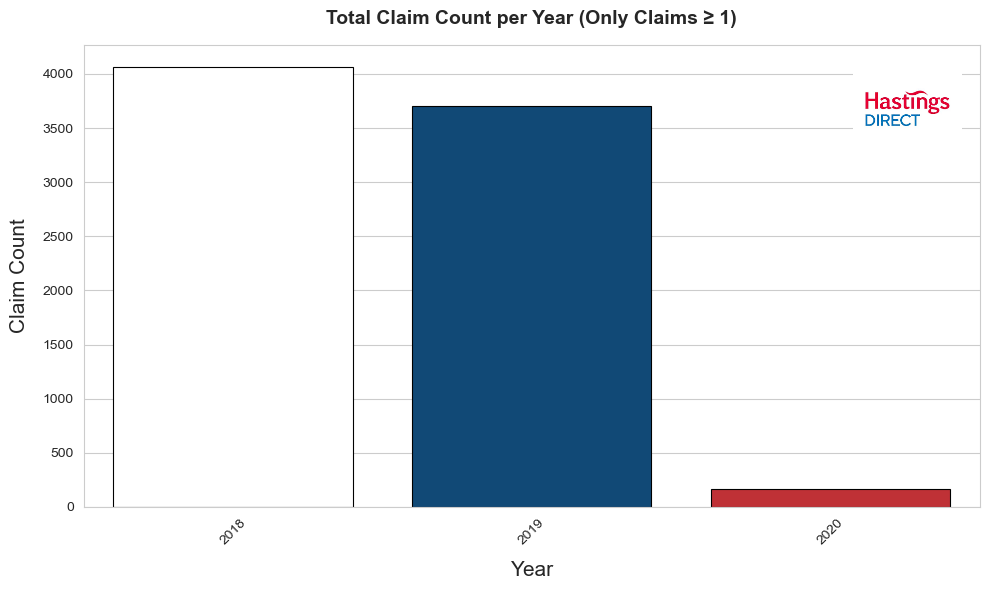

In [ ]:
# Filter rows where claim_count >= 1
df_filtered = insurance_df[insurance_df['claim_count'] >= 1].copy()

# Ensure dates are parsed, then extract year from start_date
df_filtered['start_date'] = pd.to_datetime(df_filtered['start_date'], errors='coerce')
df_filtered['year'] = df_filtered['start_date'].dt.year

# Aggregate total claim_count per year
claims_per_year = df_filtered.groupby('year')['claim_count'].sum().reset_index()

# Use unique, sorted years for hue/order
year_order = sorted(df_filtered['year'].dropna().unique())

# --- Plot with Seaborn ---
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=claims_per_year, x='year', y='claim_count',
    hue='year', hue_order=year_order,
    palette=hastings_palette,
    edgecolor='black', linewidth=0.8,
    errorbar=None
)
ax.set_title("Total Claim Count per Year (Only Claims ≥ 1)", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Year", fontsize=15, labelpad=10)
ax.set_ylabel("Claim Count", fontsize=15, labelpad=10)
plt.xticks(rotation=45)

# --- Add logo (safe if file exists) ---
logo_path = "hastings_logo.png"
try:
    logo = plt.imread(logo_path)
    imagebox = OffsetImage(logo, zoom=0.35)
    ab = AnnotationBbox(imagebox, (0.98, 0.98), xycoords='axes fraction',
                        box_alignment=(1,1), frameon=False)
    ax.add_artist(ab)
except FileNotFoundError:
    pass
# Remove redundant legend
if ax.legend_:
    ax.legend_.remove()
    
plt.tight_layout()
plt.show()


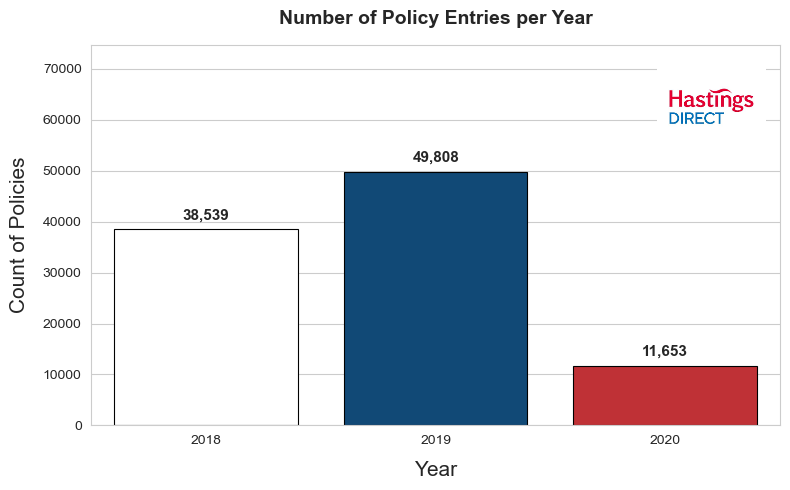

In [ ]:
# --- Year counts ---
insurance_year = insurance_df.copy()
insurance_year['year'] = insurance_year['start_date'].dt.year
entries_per_year = insurance_year['year'].value_counts().sort_index()

df_years = entries_per_year.reset_index()
df_years.columns = ['year', 'count']
df_years = df_years.sort_values('year')

# --- Custom palette ---
year_order = df_years['year'].tolist()

# --- Plot ---
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=df_years, x='year', y='count',
    hue='year', hue_order=year_order,
    palette=hastings_palette,
    edgecolor='black', linewidth=0.8
)

# Remove redundant legend
if ax.legend_:
    ax.legend_.remove()

# Title / labels styling
ax.set_title("Number of Policy Entries per Year", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Year", fontsize=15, labelpad=10)
ax.set_ylabel("Count of Policies", fontsize=15, labelpad=10)

# Add padding above bars
ymax = df_years['count'].max()
ax.set_ylim(0, ymax * 1.5)

for p in ax.patches:
    if isinstance(p, mpatches.Rectangle) and p.get_height() > 0:
        height = p.get_height()
        ax.annotate(f"{int(height):,}",
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom',
                    fontsize=11, weight='bold',
                    xytext=(0, 5), textcoords='offset points')

# --- Add logo ---
logo_path = "hastings_logo.png"
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo, zoom=0.35)

ab = AnnotationBbox(
    imagebox, (0.98, 0.98),
    xycoords='axes fraction',
    box_alignment=(1,1),
    frameon=False
)
ax.add_artist(ab)

plt.tight_layout()
plt.show()


In [ ]:
summary = (insurance_df.assign(
              start_date=pd.to_datetime(insurance_df['start_date'], errors='coerce'),
              year=lambda d: d['start_date'].dt.year)
           .groupby('year', dropna=True)
           .agg(covers_started=('id','count'),
                claim_count=('claim_count','sum'),
                earned_premium=('net_earned_premium','sum'),
                written_premium=('net_written_premium','sum'))
           .reset_index()
           .rename(columns={'year':'Year',
                            'covers_started':'Covers Started',
                            'claim_count':'Claim Count',
                            'earned_premium':'Earned Premium',
                            'written_premium':'Written Premium'})
           .sort_values('Year')
          )

# Display in £ millions with 2 dp (keep counts as ints)
summary_present = summary.copy()
summary_present['Earned Premium (£m)']  = (summary_present['Earned Premium']/1e6).round(2)
summary_present['Written Premium (£m)'] = (summary_present['Written Premium']/1e6).round(2)
summary_present[['Covers Started','Claim Count']] = summary_present[['Covers Started','Claim Count']].astype(int)

# Final columns (readable)
summary_present = summary_present[['Year','Covers Started','Claim Count',
                                   'Earned Premium (£m)','Written Premium (£m)']]
summary_present


,Year,Covers Started,Claim Count,Earned Premium (£m),Written Premium (£m)
0,2018,38539,4065,13.37,14.65
1,2019,49808,3700,13.07,17.70
2,2020,11653,169,0.79,4.08
